In [6]:
import numpy as np
from sklearn.svm import SVR 
import matplotlib.pyplot as plt 
import pandas as pd 
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import threading

In [7]:
def main(financial_data, record_to_plot):
    reports = {
    "1":{"MSE":[], "MAE":[], "R^2":[],"RMSE":[]} ,
    "2":{"MSE":[], "MAE":[], "R^2":[],"RMSE":[]} ,
    "3":{"MSE":[], "MAE":[], "R^2":[],"RMSE":[]}
    }

    
    financial_data = financial_data.reset_index()
    financial_data = financial_data[:record_to_plot]
    
    tscv = TimeSeriesSplit(n_splits=4)
    
    for train_index, test_index in tscv.split(financial_data):
        train_data, test_data = financial_data.iloc[train_index], financial_data.iloc[test_index]
        train_data, test_data = train_data["Close"], test_data["Close"]
        
        predictions, X_test, y_test = initialize_and_predict(train_data, test_data)
        plot_results(X_test, y_test, *predictions)
        report_results(y_test, *predictions,reports=reports)
        
        
    print("=====================STATS========================")
    print("RBF model: ")
    print("MSE: ", np.mean(reports["1"]["MSE"]))
    print("MAE: ", np.mean(reports["1"]["MAE"]))
    print("R^2: ", np.mean(reports["1"]["R^2"]))
    print("RMSE: ", np.mean(reports["1"]["RMSE"]))
    print("Linear model: ")
    print("MSE: ", np.mean(reports["2"]["MSE"]))
    print("MAE: ", np.mean(reports["2"]["MAE"]))
    print("R^2: ", np.mean(reports["2"]["R^2"]))
    print("RMSE: ", np.mean(reports["2"]["RMSE"]))
    print("Polynomial model: ")
    print("MSE: ", np.mean(reports["3"]["MSE"]))
    print("MAE: ", np.mean(reports["3"]["MAE"]))
    print("R^2: ", np.mean(reports["3"]["R^2"]))
    print("RMSE: ", np.mean(reports["3"]["RMSE"]))
    print("==================================================")    
        
def initialize_and_predict(train_data, test_data):
    scaler = MinMaxScaler(feature_range=(0, 1))
    
    X_train, y_train = train_data.index.values.reshape(-1, 1), train_data.values.reshape(-1, 1)
    X_test, y_test = test_data.index.values.reshape(-1, 1), test_data.values.reshape(-1, 1)

    X_train, y_train, X_test, y_test = map(scaler.fit_transform, [X_train, y_train, X_test, y_test])

    models = [SVR(kernel='rbf', C=1e7), 
              SVR(kernel='linear', C=1e7, gamma='auto'), 
              SVR(kernel='poly', C=1e7, gamma='auto',degree=3)]
    
    for model in models:
        model.fit(X_train, y_train)

    return [model.predict(X_test) for model in models], X_test, y_test

def report_results(y_test, *predictions,reports):
    print('Results: ')
    for i, prediction in enumerate(predictions):
        print(f'Model {i + 1}')
        print(f'MSE: {mean_squared_error(y_test, prediction)}')
        print(f'MAE: {mean_absolute_error(y_test, prediction)}')
        print(f'R^2: {r2_score(y_test, prediction)}')
        print(f'RMSE: {np.sqrt(mean_squared_error(y_test, prediction))}')
        print('\n')
        reports[str(i+1)]["MSE"].append(mean_squared_error(y_test, prediction))
        reports[str(i+1)]["MAE"].append(mean_absolute_error(y_test, prediction))
        reports[str(i+1)]["R^2"].append(r2_score(y_test, prediction))
        reports[str(i+1)]["RMSE"].append(np.sqrt(mean_squared_error(y_test, prediction)))


def plot_results(X_test, y_test, *predictions):
    plt.figure(figsize=(12, 6))
    plt.title('Support Vector Regression')
    x = np.arange(0, len(X_test), 1)
    plt.scatter(x, y_test, color='black', label='Data')
    
    model_names = ['RBF model', 'Linear model', 'Polynomial model']
    colors = ['red', 'orange', 'purple']
    
    for i, prediction in enumerate(predictions):
        plt.plot(prediction, color=colors[i], label=model_names[i])
    
    plt.legend()
    plt.show()
    plt.close()
    




In [8]:
financial_data = pd.read_csv(
    "..\data\EURUSD_Candlestick_4_Hour_ASK_05.05.2003-16.10.2021.csv")

# delete dollar sign
try:
    # Clean up dollar signs and convert columns to numeric values
    financial_data["Close/Last"] = financial_data["Close/Last"].str.replace(
        "$", "").astype(float)
    financial_data["Open"] = financial_data["Open"].str.replace(
        "$", "").astype(float)
    financial_data["High"] = financial_data["High"].str.replace(
        "$", "").astype(float)
    financial_data["Low"] = financial_data["Low"].str.replace(
        "$", "").astype(float)
except Exception:
    pass

# rename the headers
try:
    financial_data.rename(columns={"Close/Last": "Close"}, inplace=True)
except Exception:
    pass

In [9]:
financial_data.rename(columns={"high": "High"}, inplace=True)
financial_data.rename(columns={"low": "Low"}, inplace=True)
financial_data.rename(columns={"open": "Open"}, inplace=True)
financial_data.rename(columns={"volume": "Volume"}, inplace=True)
financial_data.rename(columns={"close": "Close"}, inplace=True)


financial_data = financial_data.reset_index(drop=True)

c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


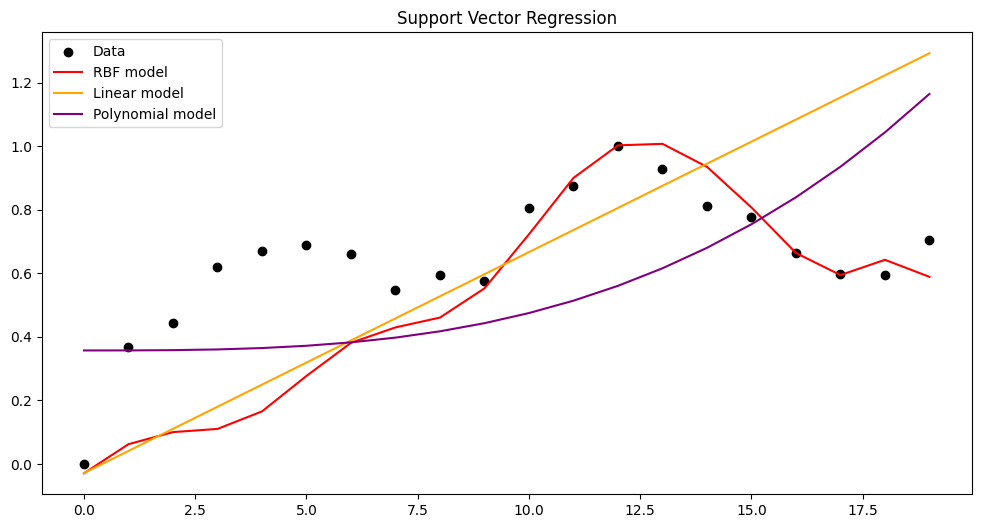

Results: 
Model 1
MSE: 0.05264197220255558
MAE: 0.15864398676489286
R^2: -0.18310710825529997
RMSE: 0.22943838432693772


Model 2
MSE: 0.10933677876649953
MAE: 0.2724908465556627
R^2: -1.4573000353148413
RMSE: 0.33066112376041357


Model 3
MSE: 0.08229409809217988
MAE: 0.25425745315606046
R^2: -0.8495266865322786
RMSE: 0.28686947919250644




c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


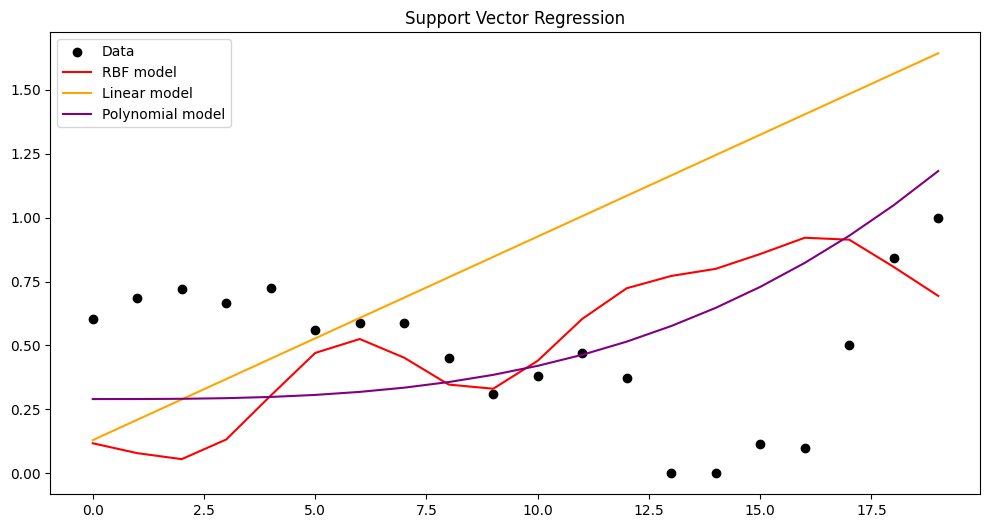

Results: 
Model 1
MSE: 0.22130678674304863
MAE: 0.37817992775734444
R^2: -2.0909333688393157
RMSE: 0.4704325528096973


Model 2
MSE: 0.5136132495927431
MAE: 0.6013930265964303
R^2: -6.1735004389515025
RMSE: 0.716668158629043


Model 3
MSE: 0.14539478463025002
MAE: 0.3224375636842431
R^2: -1.0306905092369996
RMSE: 0.38130668054762695




c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


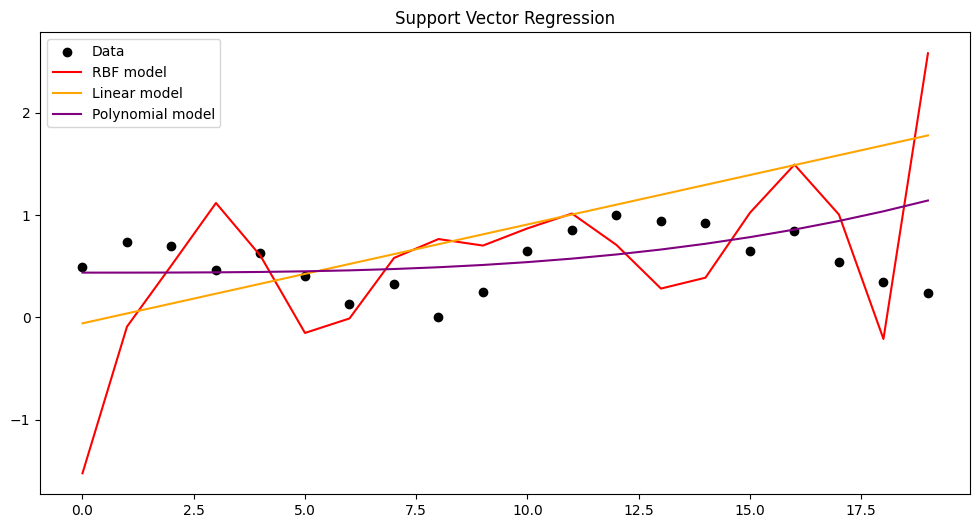

Results: 
Model 1
MSE: 0.6928819848959573
MAE: 0.6072653013656776
R^2: -7.9205853678973615
RMSE: 0.8323953296937443


Model 2
MSE: 0.4407578747891202
MAE: 0.5381195831255443
R^2: -4.6745857654529175
RMSE: 0.6638959819046356


Model 3
MSE: 0.12324136788387097
MAE: 0.27501099152577313
R^2: -0.5866845538343706
RMSE: 0.351057499398419




c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Python3_11_4_64bit\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


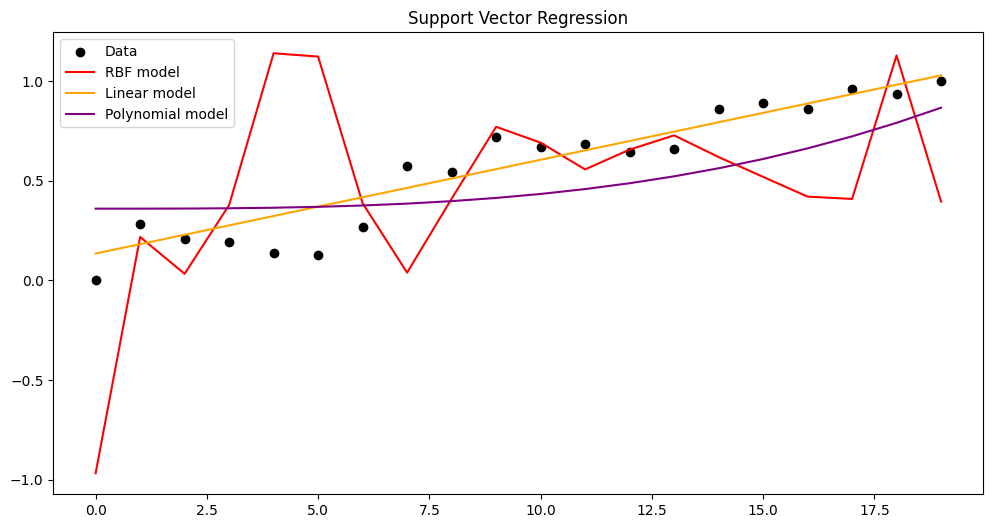

Results: 
Model 1
MSE: 0.22229876826802086
MAE: 0.34327869323524746
R^2: -1.2733568892857412
RMSE: 0.47148570314275795


Model 2
MSE: 0.010971160920695658
MAE: 0.08534315578875289
R^2: 0.8878025080532399
RMSE: 0.10474330967033482


Model 3
MSE: 0.045566028302074034
MAE: 0.20119608899201996
R^2: 0.5340152122074944
RMSE: 0.21346200669457324


=====================STATS========================
RBF model: 
MSE:  0.2972823780273956
MAE:  0.37184197728079055
R^2:  -2.8669956835694297
RMSE:  0.5009379924932844
Linear model: 
MSE:  0.2686697660172646
MAE:  0.3743366530165976
R^2:  -2.8543959329165056
RMSE:  0.4539921434911067
Polynomial model: 
MSE:  0.09912406972709373
MAE:  0.2632255243395242
R^2:  -0.48322163434903853
RMSE:  0.3081739164582814


In [10]:
main(financial_data,100)